In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
filename1 = '/Users/enjlife/machine-learning/machinelearninginaction/ch13/testSet.txt'
filename2 = '/Users/enjlife/machine-learning/machinelearninginaction/ch13/secom.data'

In [57]:
def loaddata(filename,delim='\t'):
    with open(filename) as fr:
        arr = [line.strip().split(delim) for line in fr.readlines()]
    dataarr = np.array(arr).astype(float)
    return dataarr

In [36]:
def pca(data,nfeat=9999999):
    meanval = np.mean(data,0)
    meanre = data - meanval
    #此处会获取一个2x2协方差矩阵
    covmat = np.cov(meanre,rowvar=False)#rowvar为0 行代表一条数据，列代表一个特征 默认为True
    eigval,eigvect = np.linalg.eig(covmat)
    eigvalind = np.argsort(eigval)#获取排序后的索引
    eigvalind = eigvalind[:-(nfeat+1):-1]#倒序，取倒序的前nfeat个
    redeigvect = eigvect[:,eigvalind]
    
    lowdat = np.dot(meanre,redeigvect)
    recon = np.dot(lowdat,redeigvect.T) + meanval
    return lowdat,recon
    

In [40]:
data = loaddata(filename1)
lowdat,recon = pca(data,1)

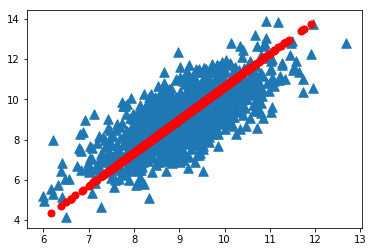

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data[:,0],data[:,1],marker='^',s=90)
ax.scatter(recon[:,0],recon[:,1],marker='o',s=50,c='red')
plt.show()

In [51]:
a = np.array([3,4,2,1,4,6,2,9])
b = np.argsort(a)
print(b)
c = b[:3]
d = b[:-(3+1):-1]
e = b[:3:-1]
print(c,'\n',d,'\n',e)

[3 2 6 0 1 4 5 7]
[3 2 6] 
 [7 5 4] 
 [7 5 4 1]


In [69]:
def replacenan():
    data2 = loaddata(filename2,' ')
    numfeat = data2.shape[1]
    for i in range(numfeat):
        meanval = np.mean(data2[np.nonzero(~np.isnan(data2[:,i]))[0],i])#~np.isnan()取nan的值
        data2[np.nonzero(np.isnan(data2[:,i]))[0],i] = meanval
    return data2

In [70]:
data2 = replacenan()
print(data2)
meanval = np.mean(data2,axis=0)
meanre = data2 - meanval

cova = np.cov(meanre,rowvar=0)

eigval,eigvect = np.linalg.eig(cova)

[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.64749042e-02
  5.28333333e-03 9.96700663e+01]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [2.97881000e+03 2.37978000e+03 2.20630000e+03 ... 8.60000000e-03
  2.50000000e-03 4.35231000e+01]
 [2.89492000e+03 2.53201000e+03 2.17703330e+03 ... 2.45000000e-02
  7.50000000e-03 9.34941000e+01]
 [2.94492000e+03 2.45076000e+03 2.19544440e+03 ... 1.62000000e-02
  4.50000000e-03 1.37784400e+02]]


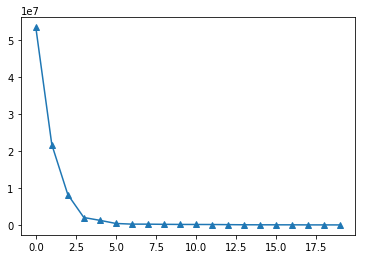

In [76]:
plt.figure()
plt.plot(eigval[:20],marker='^')